In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('/content/drive/MyDrive/25년 해군 AI 경진대회/combined_ais_20230601_20240531.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2678129 entries, 0 to 2678128
Data columns (total 28 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   MMSI                   int64  
 1   is_korean_ship         int64  
 2   num_points             int64  
 3   trajectory_duration    float64
 4   avg_sog                float64
 5   std_sog                float64
 6   max_sog                float64
 7   min_sog                float64
 8   avg_cog                float64
 9   std_cog                float64
 10  sharp_turns            int64  
 11  anchor_zone_ratio      float64
 12  anchor_stop_time       float64
 13  low_speed_ratio        float64
 14  num_low_speed_periods  int64  
 15  area_coverage_km2      float64
 16  min_lat                float64
 17  max_lat                float64
 18  min_lon                float64
 19  max_lon                float64
 20  avg_interval_sec       float64
 21  max_gap_sec            float64
 22  off_events        

### Dataset Info ###
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2678129 entries, 0 to 2678128
Data columns (total 28 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   MMSI                   int64  
 1   is_korean_ship         int64  
 2   num_points             int64  
 3   trajectory_duration    float64
 4   avg_sog                float64
 5   std_sog                float64
 6   max_sog                float64
 7   min_sog                float64
 8   avg_cog                float64
 9   std_cog                float64
 10  sharp_turns            int64  
 11  anchor_zone_ratio      float64
 12  anchor_stop_time       float64
 13  low_speed_ratio        float64
 14  num_low_speed_periods  int64  
 15  area_coverage_km2      float64
 16  min_lat                float64
 17  max_lat                float64
 18  min_lon                float64
 19  max_lon                float64
 20  avg_interval_sec       float64
 21  max_gap_sec            float64
 2

ValueError: num must be an integer with 1 <= num <= 25, not 26

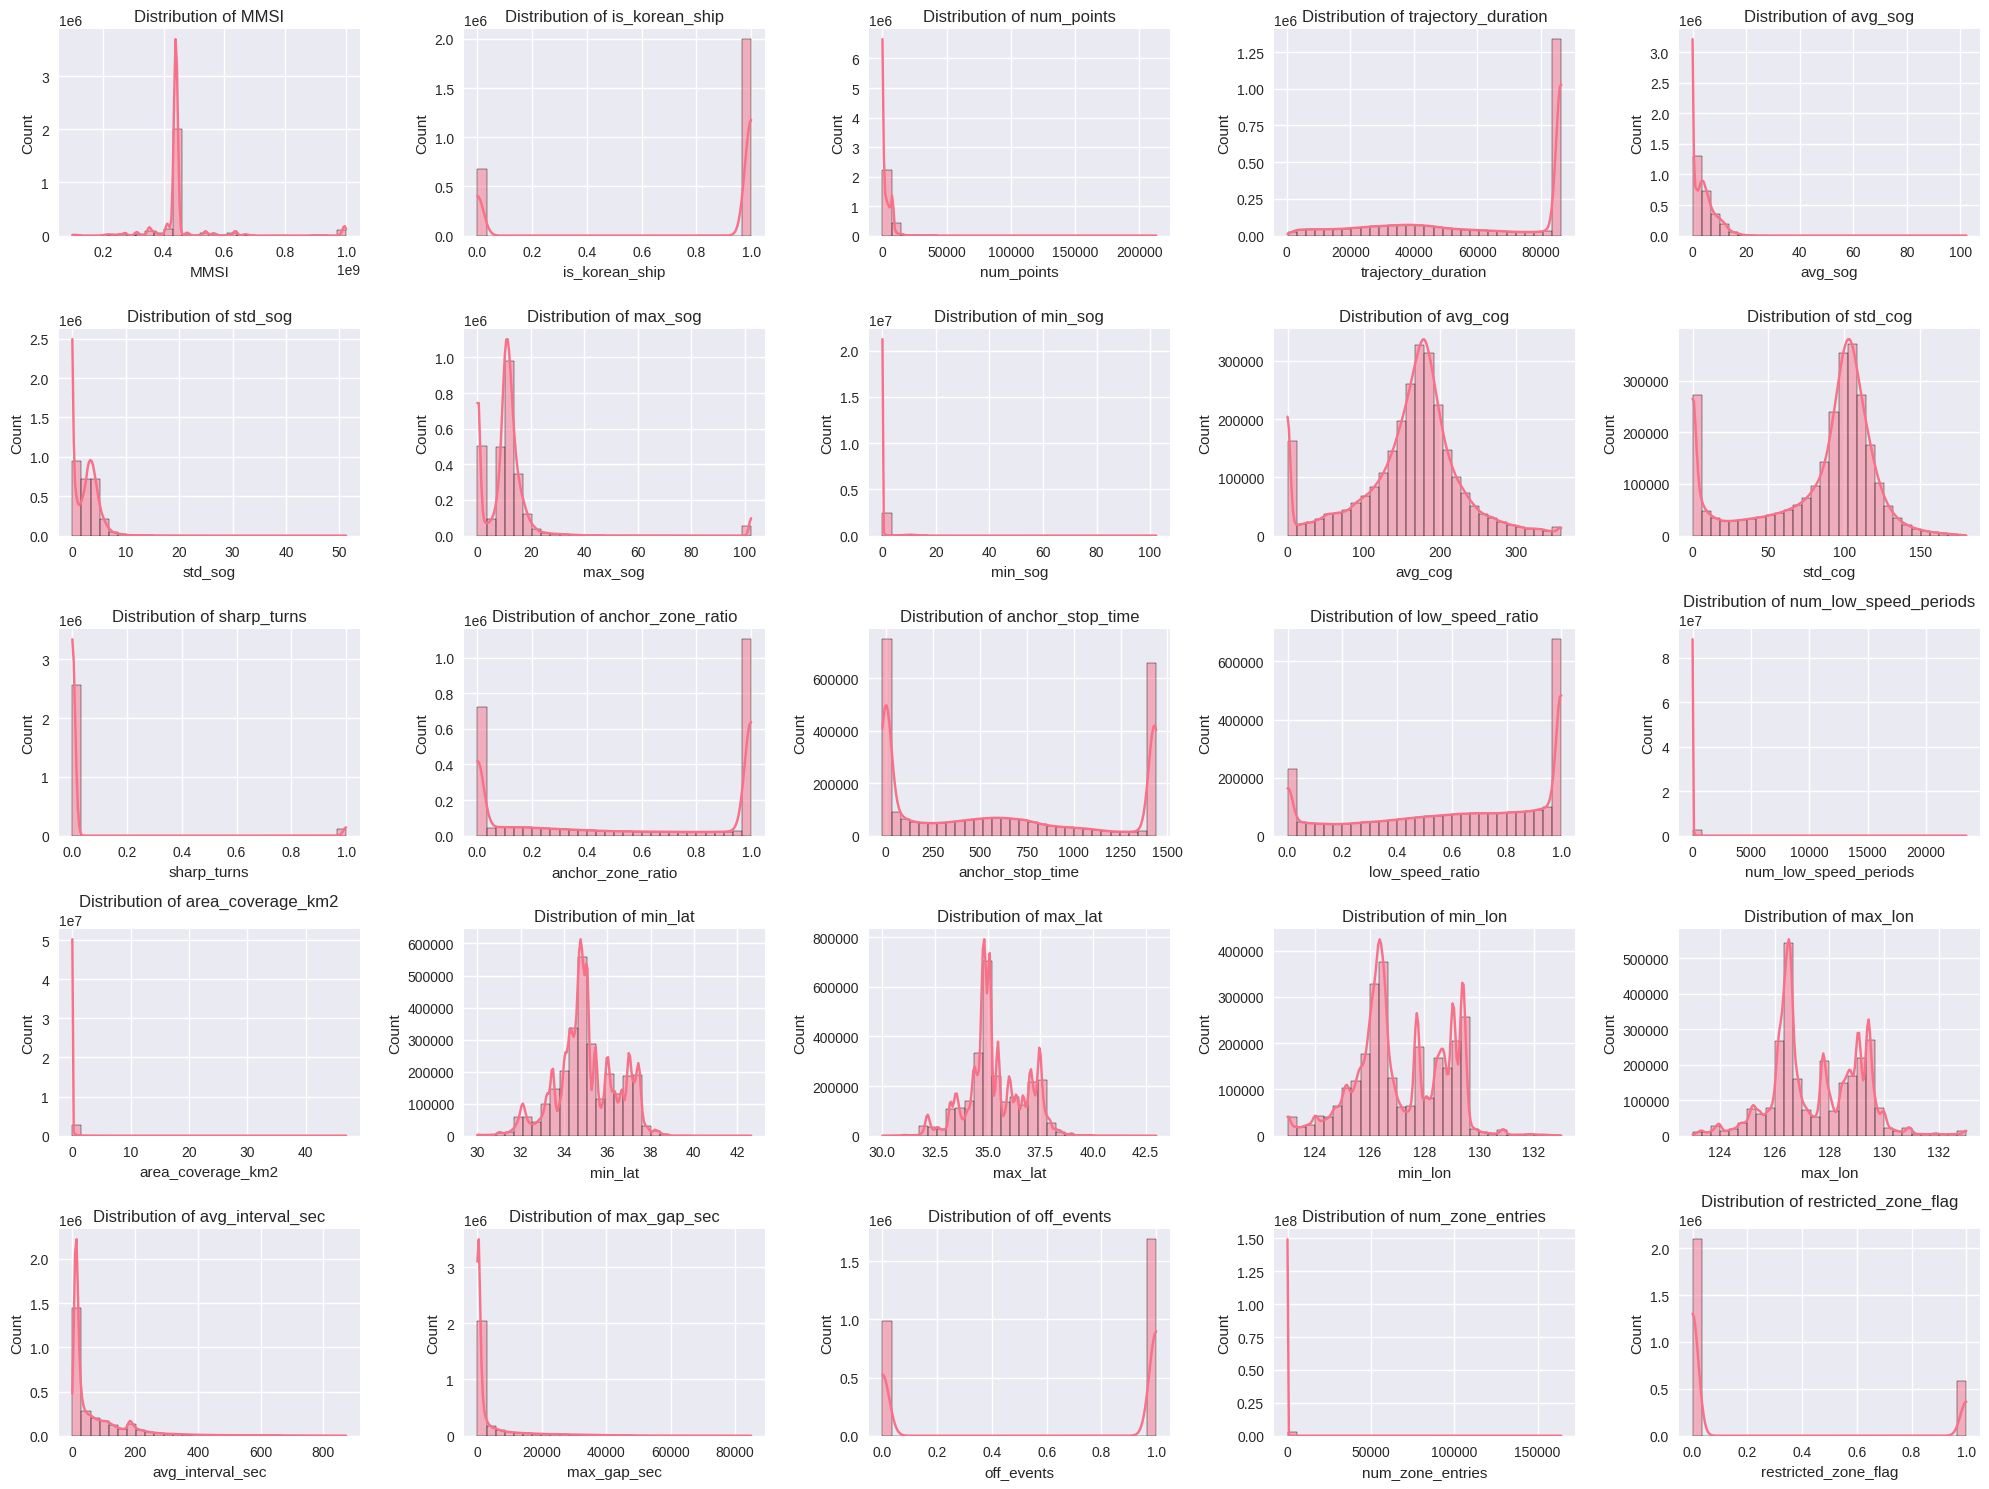

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt


# Set visualization style
sns.set_palette('husl')

# Load the dataset
file_path = '/content/drive/MyDrive/25년 해군 AI 경진대회/combined_ais_20230601_20240531.csv'
df = pd.read_csv(file_path)

# 1. Basic Information
print("### Dataset Info ###")
print(df.info())
print("\n### Summary Statistics ###")
print(df.describe())

# 2. Missing Values
print("\n### Missing Values ###")
print(df.isnull().sum())

# Handle missing values (drop rows with missing values for simplicity)
df_clean = df.dropna()
print(f"\nRows after dropping missing values: {df_clean.shape[0]} (Original: {df.shape[0]})")

# 3. Distribution of Numerical Variables
numerical_cols = df_clean.select_dtypes(include=['float64', 'int64']).columns
plt.figure(figsize=(20, 15))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(5, 5, i)
    sns.histplot(df_clean[col], bins=30, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.tight_layout()
plt.savefig('numerical_distributions.png')
plt.close()

# 4. Distribution of Categorical/Boolean Variables
categorical_cols = ['result']  # 'result' is boolean, treated as categorical here
plt.figure(figsize=(8, 6))
sns.countplot(x='result', data=df_clean)
plt.title('Count of Result (True/False)')
plt.savefig('result_count.png')
plt.close()

# 5. Correlation Analysis
plt.figure(figsize=(15, 10))
corr = df_clean[numerical_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numerical Variables')
plt.savefig('correlation_heatmap.png')
plt.close()

# 6. Boxplots for Key Variables by 'result'
key_vars = ['avg_sog', 'trajectory_duration', 'area_coverage_km2']
for var in key_vars:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='result', y=var, data=df_clean)
    plt.title(f'{var} by Result')
    plt.savefig(f'boxplot_{var}_by_result.png')
    plt.close()

# 7. Outlier Detection using IQR
Q1 = df_clean[numerical_cols].quantile(0.25)
Q3 = df_clean[numerical_cols].quantile(0.75)
IQR = Q3 - Q1
outliers = ((df_clean[numerical_cols] < (Q1 - 1.5 * IQR)) | (df_clean[numerical_cols] > (Q3 + 1.5 * IQR))).any(axis=1)
print("\n### Outliers ###")
print(f"Number of rows with outliers: {outliers.sum()}")
print(df_clean[outliers].head())

# 8. Time Series Analysis (for 'date')
df_clean['date'] = pd.to_datetime(df_clean['date'])
plt.figure(figsize=(12, 6))
df_clean.set_index('date')['avg_sog'].resample('M').mean().plot()
plt.title('Monthly Average Speed Over Ground (avg_sog)')
plt.xlabel('Date')
plt.ylabel('Average SOG')
plt.savefig('avg_sog_timeseries.png')
plt.close()

# 9. Geographical Visualization (latitude and longitude)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='min_lon', y='min_lat', hue='result', size='avg_sog', data=df_clean, alpha=0.5)
plt.title('Geographical Distribution of Ships (min_lat vs min_lon)')
plt.xlabel('Minimum Longitude')
plt.ylabel('Minimum Latitude')
plt.savefig('geo_scatter.png')
plt.close()

print("\n### EDA Complete ###")
print("Visualizations saved as PNG files in the current directory.")

In [8]:
# 4. Distribution of Categorical/Boolean Variables
categorical_cols = ['result']  # 'result' is boolean, treated as categorical here
plt.figure(figsize=(8, 6))
sns.countplot(x='result', data=df_clean)
plt.title('Count of Result (True/False)')
plt.savefig('result_count.png')
plt.close()

In [9]:
# 5. Correlation Analysis
plt.figure(figsize=(15, 10))
corr = df_clean[numerical_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numerical Variables')
plt.savefig('correlation_heatmap.png')
plt.close()

In [10]:
# 6. Boxplots for Key Variables by 'result'
key_vars = ['avg_sog', 'trajectory_duration', 'area_coverage_km2']
for var in key_vars:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='result', y=var, data=df_clean)
    plt.title(f'{var} by Result')
    plt.savefig(f'boxplot_{var}_by_result.png')
    plt.close()

In [11]:
# 7. Outlier Detection using IQR
Q1 = df_clean[numerical_cols].quantile(0.25)
Q3 = df_clean[numerical_cols].quantile(0.75)
IQR = Q3 - Q1
outliers = ((df_clean[numerical_cols] < (Q1 - 1.5 * IQR)) | (df_clean[numerical_cols] > (Q3 + 1.5 * IQR))).any(axis=1)
print("\n### Outliers ###")
print(f"Number of rows with outliers: {outliers.sum()}")
print(df_clean[outliers].head())


### Outliers ###
Number of rows with outliers: 1986304
        MMSI  is_korean_ship  num_points  trajectory_duration    avg_sog  \
0  111440527               0         116             1440.718   7.867241   
1  111234568               0         170             2110.320   7.571765   
2  111440530               0         157             2370.540   5.030573   
3  111440540               0         103            22040.531  10.517476   
4  111440508               0         219             4590.621   9.098630   

    std_sog  max_sog  min_sog     avg_cog     std_cog  ...     min_lon  \
0  5.550633     15.2      0.0  186.159483   95.626493  ...  126.247375   
1  3.449590     13.6      3.7  187.093529  102.388543  ...  128.680600   
2  4.546747     10.9      0.0  159.060510   92.049125  ...  126.305495   
3  3.428697     13.3      0.5  221.100000  117.177841  ...  126.756060   
4  4.435827     13.8      0.0  165.099087   95.252947  ...  128.107745   

      max_lon  avg_interval_sec  max_gap_s

In [12]:
# 8. Time Series Analysis (for 'date')
df_clean['date'] = pd.to_datetime(df_clean['date'])
plt.figure(figsize=(12, 6))
df_clean.set_index('date')['avg_sog'].resample('M').mean().plot()
plt.title('Monthly Average Speed Over Ground (avg_sog)')
plt.xlabel('Date')
plt.ylabel('Average SOG')
plt.savefig('avg_sog_timeseries.png')
plt.close()

<ipython-input-12-fc2954deb634>:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_clean.set_index('date')['avg_sog'].resample('M').mean().plot()


In [13]:
# 9. Geographical Visualization (latitude and longitude)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='min_lon', y='min_lat', hue='result', size='avg_sog', data=df_clean, alpha=0.5)
plt.title('Geographical Distribution of Ships (min_lat vs min_lon)')
plt.xlabel('Minimum Longitude')
plt.ylabel('Minimum Latitude')
plt.savefig('geo_scatter.png')
plt.close()

<ipython-input-13-89bc967e21c0>:7: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig('geo_scatter.png')


In [14]:
print("\n### EDA Complete ###")
print("Visualizations saved as PNG files in the current directory.")


### EDA Complete ###
Visualizations saved as PNG files in the current directory.
